In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
## Loading the dataset
# mnist = tf.keras.datasets.fashion_mnist
mnist = tf.keras.datasets.mnist

In [3]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
xtrain.shape, ytrain.shape

((60000, 28, 28), (60000,))

In [5]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

In [6]:
# Visualizing the image matrix
xtrain[12]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  12,  99,  91, 142, 155, 246, 182, 155, 155, 155,
        155, 131,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
ytrain[12]

3

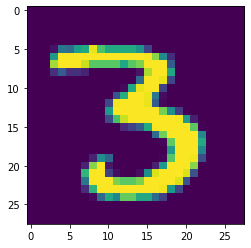

In [8]:
plt.imshow(xtrain[12])
plt.show()

5


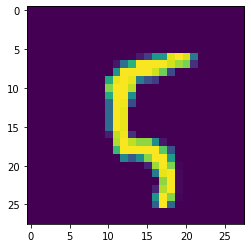

In [9]:
print(ytrain[100])
plt.imshow(xtrain[100])
plt.show()

5


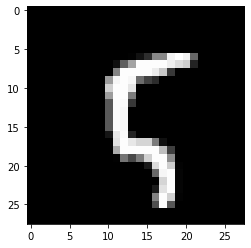

In [10]:
# Actual color, else matplotlib converts into BGR
# usually color is not recommended.Thus we transform it into grayscale  
print(ytrain[100])
plt.imshow(xtrain[100],cmap='gray')
plt.show()

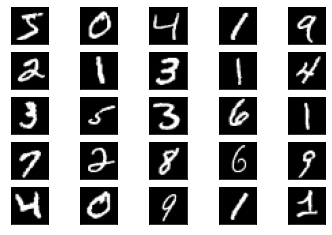

In [13]:
# Visualizing the first 25 training samples
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])  # Removing x markers
  plt.yticks([])  # Removing y markers
  plt.imshow(xtrain[i],cmap='gray')
plt.show()

In [0]:
### Building the model
model = tf.keras.models.Sequential()

### Adding the layers(including the hidden layer)
model.add(tf.keras.layers.Flatten())  # Assuming that we don't know the dimensions

# 28 * 28 = 784 hidden neurons
# model.add(tf.keras.layers.Dense(784,activation='relu'))  # hidden layer

model.add(tf.keras.layers.Dense(xtrain.shape[1] * xtrain.shape[2],activation='relu'))  # hidden layer
model.add(tf.keras.layers.Dense(600,activation='relu'))  # hidden layer
model.add(tf.keras.layers.Dense(64,activation='relu'))  # hidden layer
model.add(tf.keras.layers.Dense(10,activation='softmax')) # Output layer => no of sample (0 - 9)

In [0]:
### Configure the model

# Using cross-entropy loss 
# not using MSE
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  

In [16]:
### Training the model

# 60000/32 = 1875 (Batch Size)
# default-batch size=32 (32 images are done at once)
# model.fit(xtrain,ytrain,epochs=3,batch_size=32)  

model.fit(xtrain,ytrain,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 18s 10ms/step - loss: 1.0663 - accuracy: 0.7925
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2660 - accuracy: 0.9342
Epoch 3/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1642 - accuracy: 0.9576


# Normalisation and Scaling

In [0]:
xtrain = tf.keras.utils.normalize(xtrain)
xtest = tf.keras.utils.normalize(xtest)

# print(xtrain)

In [19]:
### Building the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())  

model.add(tf.keras.layers.Dense(xtrain.shape[1] * xtrain.shape[2],activation='relu'))  
model.add(tf.keras.layers.Dense(600,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))  
model.add(tf.keras.layers.Dense(10,activation='softmax')) 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])  

model.fit(xtrain,ytrain,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2064 - accuracy: 0.9363
Epoch 2/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0894 - accuracy: 0.9722
Epoch 3/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0608 - accuracy: 0.9810


In [0]:
### Predictions 
predictions = model.predict(xtest)

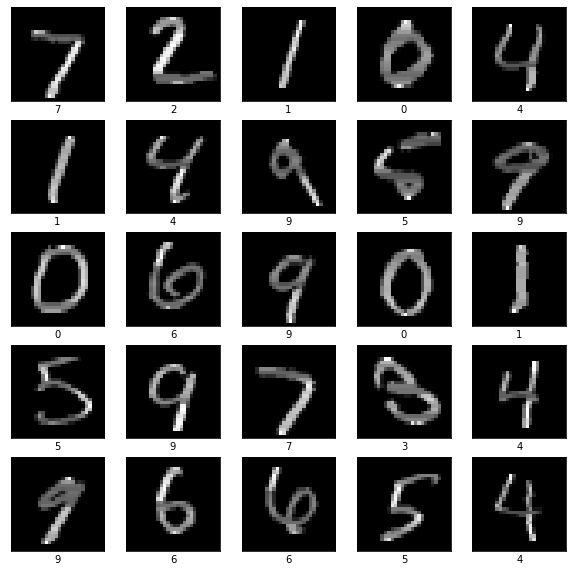

In [25]:
## Visualizing the testing samples
plt.figure(figsize =(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])  # Removing x markers
  plt.yticks([])  # Removing y markers
  plt.imshow(xtest[i],cmap='gray')
  plt.xlabel(np.argmax(predictions[i]))
plt.show()

In [28]:
# postulating that the highest probaility is the prediction
print(ytest[0])
print((predictions[0]))

7
[2.2862565e-07 2.4730160e-05 5.2245268e-05 2.7809442e-06 5.8221195e-07
 6.4372017e-07 5.1231233e-09 9.9756795e-01 1.7636671e-07 2.3507089e-03]


In [29]:
loss,accu = model.evaluate(xtest,ytest)
loss,accu

313/313 [==============================] - 1s 4ms/step - loss: 0.1092 - accuracy: 0.9690


(0.10921613872051239, 0.968999981880188)

In [0]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(ytest, np.argmax(predictions))